In [30]:
##import libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [31]:
## Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [32]:
## Read HTML from URL
top = 'https://www.gutenberg.org/browse/scores/top'
res = requests.get(top)

In [33]:
##function to check status of web request
def status(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [34]:
status(res)

Success!


1

In [35]:
##Decode the response and pass this on to BeautifulSoup for HTML parsing
content = res.content.decode(res.encoding)
soup = BeautifulSoup(content, 'html.parser')

In [36]:
##Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements
links=[] ##empty list to store links
for link in soup.find_all('a'): ##finds tags and stores them in list
    links.append(link.get('href'))
links[:30] ##returns part of list

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [37]:
##Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks

book=[]##list to store
##Number 19 to 118 in the original list of links have the Top 100 ebooks' number.
##Loop over appropriate range and use regex to find the numeric digits in the link (href) string.
for i in range(19,119):
    link=links[i]
    link=link.strip()# Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:# Append the filenumber casted as integer
        book.append(int(n[0]))

In [38]:
print("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(book)##Print file numbers


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 84, 1342, 25344, 46, 1250, 345, 11, 2701, 174, 28548, 64317, 43, 1080, 2542, 844, 1661, 1260, 76, 98, 66667, 66668, 205, 219, 5200, 4980, 1232, 160, 1952, 66663, 66669, 23, 2591, 1727, 74, 32992, 41, 63256, 2554, 2600, 6130, 408, 2852, 66671, 215, 16, 3825, 2148, 1400, 1184, 514, 16328, 4300, 55, 7370, 5740, 996, 2814, 48809, 120, 730, 3207, 34901, 45, 66661, 158, 768, 203, 2500, 36, 1497, 11030, 58585, 8492, 42884, 28054, 829, 32449, 244, 140, 779, 1524, 20203, 13701, 1597, 30254, 4363]


In [39]:
print(soup.text[:2000])##What the soup looks like





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-11-05161900
last 7 days1176730
last 30 days4937924



Top 100 EBooks yesterd

In [40]:
##Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking)

titles_temp=[]##temporary list for ebooks
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')##create starting index
##Loop 1-100 to add the strings of next 100 lines to this temporary list
for i in range(100):
    titles_temp.append(soup.text.splitlines()[start_idx+2+i])

In [41]:
##Use regular expression to extract only text from the name strings and append to an empty list
titles=[]##empty list of titles
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',titles_temp[i]).span()
    titles.append(titles_temp[i][id1:id2])

In [42]:
for l in titles:##print titles
    print(l)

Top 
Top 
Top 
Top 


Top 

Frankenstein
Pride and Prejudice by Jane Austen 
The Scarlet Letter by Nathaniel Hawthorne 
A Christmas Carol in Prose
Anthem by Ayn Rand 
Dracula by Bram Stoker 
Alice
Moby Dick
The Picture of Dorian Gray by Oscar Wilde 
Gipsy Life by George Smith 
The Great Gatsby by F
The Strange Case of Dr
A Modest Proposal by Jonathan Swift 
A Doll
The Importance of Being Earnest
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Jane Eyre
Adventures of Huckleberry Finn by Mark Twain 
A Tale of Two Cities by Charles Dickens 
Penmanship
Butterflies and Moths
Walden
Heart of Darkness by Joseph Conrad 
Metamorphosis by Franz Kafka 
Old Granny Fox by Thornton W
The Prince by Niccol
The Awakening
The Yellow Wallpaper by Charlotte Perkins Gilman 
Ancient history from the monuments
The Sea
Narrative of the Life of Frederick Douglass
Grimms
The Odyssey by Homer 
The Adventures of Tom Sawyer
The Youngest Girl in the School by Evelyn Sharp 
The Legend of Sleepy Hollow by Wa

In [43]:
import urllib.request, urllib.parse, urllib.error
import json

In [44]:
response = requests.get("http://www.omdbapi.com/?i=tt3896198&apikey=725d9979").text ##secret api key

In [45]:
omdbapi = json.loads(response)##Loads txt file of API into JSON

In [46]:
url = 'http://www.omdbapi.com/?i=tt3896198&apikey=725d9979/'
apikey = '&apikey=725d9979'

In [47]:
##Write a utility function called print_json to print the movie data from a 
##JSON file (which we will get from the portal)

def print_json(json_data):
    keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [48]:
##Write a utility function to download a poster of the movie based on the information
##from the jason dataset and save in your local folder

def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']## Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]## Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read() 
    savelocation=os.getcwd()+'\\'+'Posters'+'\\' ## Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation) 
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [55]:
##Write a utility function search_movie to search a movie by its name, 
##print the downloaded JSON data and save the movie poster in the local folder
def search_movie(title):
    try:
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [56]:
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?i=tt3896198&apikey=725d9979/
ERROR: Unauthorized


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
candy = pd.read_excel('CANDYDATA.xlsx')
candy

/Users/aarondrexler/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ITEM,JOY,DESPAIR,NET FEELIES,NET CLOUT,DESPAIR (NEG)
0,York Peppermint Patties,634,78,556.0,1.639118,-78.0
1,Whole Wheat anything,21,419,-398.0,1.012938,-419.0
2,White Bread,15,473,-458.0,1.123440,-473.0
3,Vicodin,323,210,113.0,1.227036,-210.0
4,Twix,770,26,744.0,1.832497,-26.0
...,...,...,...,...,...,...
82,Black Jacks,34,252,-218.0,0.658410,-252.0
83,Any full-sized candy bar,828,13,815.0,1.936093,-13.0
84,Anonymous brown globs that come in black and o...,120,663,-543.0,1.802569,-663.0
85,100 Grand Bar,570,34,536.0,1.390488,-34.0


In [7]:
candy1=candy.dropna()
candy1

,ITEM,JOY,DESPAIR,NET FEELIES,NET CLOUT,DESPAIR (NEG)
0,York Peppermint Patties,634,78,556.0,1.639118,-78.0
1,Whole Wheat anything,21,419,-398.0,1.012938,-419.0
2,White Bread,15,473,-458.0,1.123440,-473.0
3,Vicodin,323,210,113.0,1.227036,-210.0
4,Twix,770,26,744.0,1.832497,-26.0
...,...,...,...,...,...,...
81,Bonkers,31,99,-68.0,0.299277,-99.0
82,Black Jacks,34,252,-218.0,0.658410,-252.0
83,Any full-sized candy bar,828,13,815.0,1.936093,-13.0
84,Anonymous brown globs that come in black and o...,120,663,-543.0,1.802569,-663.0


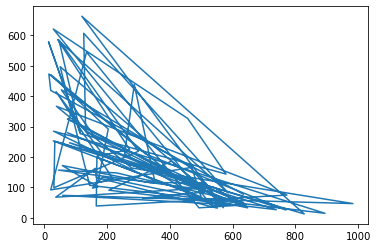

In [9]:
plt.plot(candy1['JOY'],candy1['DESPAIR'])
plt.show()

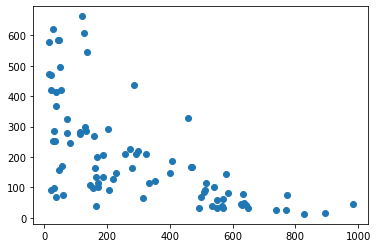

In [10]:
plt.scatter(candy1['JOY'],candy1['DESPAIR'])
plt.show()

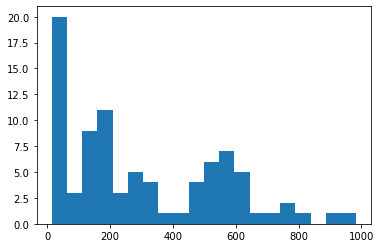

In [11]:
num_bins = 20
plt.hist(candy1['JOY'], bins=num_bins)
plt.show()